In [ ]:
K_MAX = 50
LAG = 2

Train#=30732 Test#=13172
Labels=[0. 1.]
d='manhattan', k=1, accuracy: 85.606%
d='manhattan', k=3, accuracy: 84.065%
d='manhattan', k=5, accuracy: 82.372%
d='manhattan', k=7, accuracy: 80.269%
d='manhattan', k=9, accuracy: 78.621%
d='manhattan', k=11, accuracy: 77.475%
d='manhattan', k=13, accuracy: 76.989%
d='manhattan', k=15, accuracy: 76.480%
d='manhattan', k=17, accuracy: 75.979%
d='manhattan', k=19, accuracy: 75.714%
d='manhattan', k=21, accuracy: 75.660%
d='manhattan', k=23, accuracy: 75.569%
d='manhattan', k=25, accuracy: 75.251%
d='manhattan', k=27, accuracy: 75.372%
d='manhattan', k=29, accuracy: 75.380%
d='manhattan', k=31, accuracy: 75.129%
d='manhattan', k=33, accuracy: 74.992%
d='manhattan', k=35, accuracy: 74.886%
d='manhattan', k=37, accuracy: 74.636%
d='manhattan', k=39, accuracy: 74.689%
d='manhattan', k=41, accuracy: 74.712%
d='manhattan', k=43, accuracy: 74.833%
d='manhattan', k=45, accuracy: 74.894%
d='manhattan', k=47, accuracy: 75.023%
d='manhattan', k=49, accuracy

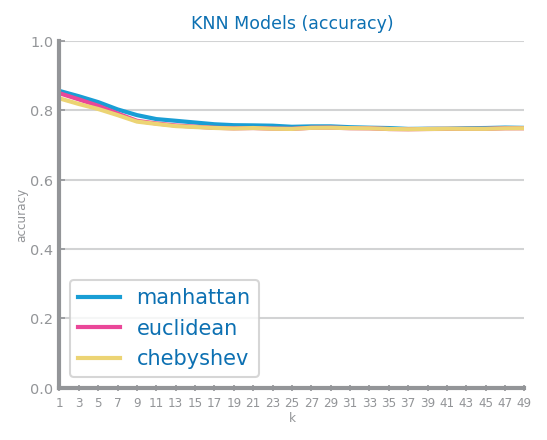

In [ ]:
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart
from dslabs_functions import read_train_test_from_files, plot_evaluation_results

def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max=K_MAX, lag=LAG, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            print(f"{d=}, {k=}, ", end="")
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            print(f"{metric}: {eval:.3%}")
        values[d] = y_tst_values
    print(f"KNN best with k={best_params['params'][0]} and {best_params['params'][1]}")
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params

file_tag = 'service'
train_filename = '/content/drive/MyDrive/Colab Notebooks/class_credit_score_train.csv'
test_filename = '/content/drive/MyDrive/Colab Notebooks/class_credit_score_test.csv'
target = 'Credit_Score'
eval_metric = 'accuracy'

trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = knn_study(trnX, trnY, tstX, tstY, metric=eval_metric)
savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

<Figure size 600x450 with 0 Axes>

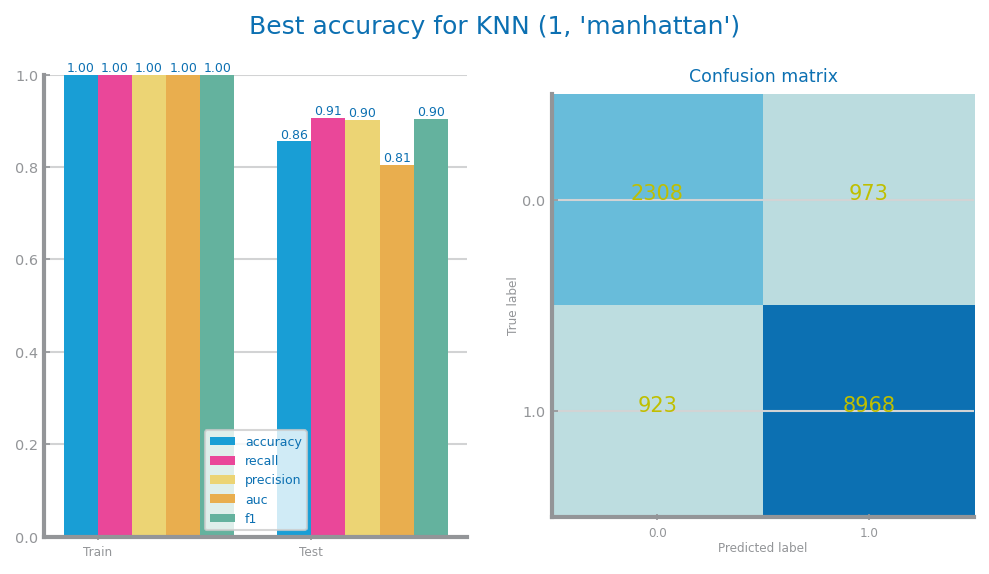

In [ ]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49


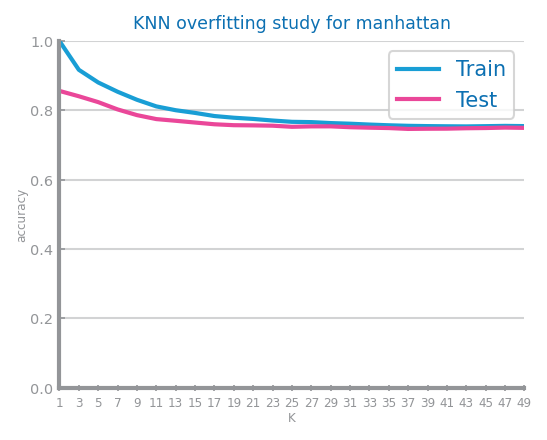

In [ ]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
kvalues = [i for i in range(1, K_MAX+1, LAG)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    print(k)
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}_knn_overfitting.png")
show()